<a href="https://colab.research.google.com/github/ysimonov/TensorFlow-Developer-Certificate-Course-Udemy/blob/main/01_tensorflow_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in Tensorflow

Regression problem: predicting a number based on other (input) numbers.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.2


### Creating some data for view and fit

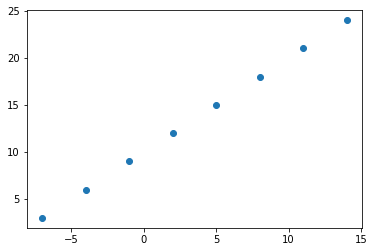

In [ ]:
# Create features
X = np.array([-7, -4, -1, 2, 5, 8, 11, 14], dtype=np.float32)

# Create labels
y = np.array([3, 6, 9, 12, 15, 18, 21, 24], dtype=np.float32)

# Visualize data
plt.scatter(X, y)

In [ ]:
# Relationship that neural network should learn
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output shapes

In [ ]:
# Create a demo tensor for price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
# Turn Numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

### Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers
2. **Compiling a model** - define the loss function (in other words, the function that tells how wrong prediction of the model is relative to desired outputs),
and the optimizer (tells our model to improve patterns its learning) and evaluate metrics (what can be used to interpret the performance of the model)
3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels)

### Summary of Required Steps
* Get data ready (turn it into tensors)
* Build or pick a pretrained model
* Fit the model to the data and make a prediction
* Evaluate the model
* Improve through experimentation
* Save and reload trained model

### Defining a Simple Linear Regression Model

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae, # Mean Absolute Error
    optimizer=tf.keras.optimizers.SGD(), # Stochastic Gradient Descent
    metrics=["mae"] # can use string instead of tf.keras.losses.mae
)

# 3. Fit the model
# tf.expand_dims is used to convert (n,) into (n, 1) shape
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 19ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 19ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 19ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 28ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try to make a prediction using trained model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [ ]:
# mae is ~11 (or more) off on average from desired values, 
# hence prediction is not accurate
y_pred + 11

array([[23.71602]], dtype=float32)

### Improving a Model

The model can be improved by altering the steps, such as:

1. **Creating a model** - add more layers, increase number of hidden units (neurons within hidden layers), change activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (train for longer), or give the model more examples to learn from.

### Improve model predictions by altering number of epochs

In [ ]:
# Let's rebuild the model

# 1. Create the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(
    loss="mae",
    optimizer="sgd",
    metrics=["mae"]
)

# 3. Train the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 455ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 22ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] 

In [ ]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's see if our model's prediction has improved
model.predict([17.0])

array([[29.739855]], dtype=float32)

### See the effect of changing optimizer from SGD to Adam

In [ ]:
# Let's rebuild the model

# 1. Create the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(
    loss="mae",
    optimizer="adam",
    metrics=["mae"]
)

# 3. Train the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 332ms/step - loss: 10.5736 - mae: 10.5736
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 10.5691 - mae: 10.5691
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 10.5646 - mae: 10.5646
Epoch 4/100
1/1 [==============================] - 0s 22ms/step - loss: 10.5601 - mae: 10.5601
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 10.5556 - mae: 10.5556
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5511 - mae: 10.5511
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 10.5466 - mae: 10.5466
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 10.5421 - mae: 10.5421
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 10.5376 - mae: 10.5376
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 10.5331 - mae: 10.5331
Epoch 11/100
1/1 [==============================]

### Although Adam Optimizer is more stable, SGD provides much faster convergence. 

### Try increasing the number of hidden layers and neurons per layer

In [ ]:
# 1. Create a bigger model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)                            
])

# 2. Compile the model
model.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.002),
    metrics=["mae"]
)

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 713ms/step - loss: 13.5644 - mae: 13.5644
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 13.4908 - mae: 13.4908
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 13.4191 - mae: 13.4191
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 13.3474 - mae: 13.3474
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 13.2734 - mae: 13.2734
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 13.2007 - mae: 13.2007
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 13.1332 - mae: 13.1332
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 13.0667 - mae: 13.0667
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 13.0025 - mae: 13.0025
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 12.9397 - mae: 12.9397
Epoch 11/100
1/1 [==============================] - 

In [ ]:
model.predict([17.])

array([[31.839039]], dtype=float32)

### Try switching to Adam optimizer

In [ ]:
# 1. Create a bigger model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)                            
])

# 2. Compile the model
model.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
    metrics=["mae"]
)

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 461ms/step - loss: 13.5956 - mae: 13.5956
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 12.4916 - mae: 12.4916
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 11.4001 - mae: 11.4001
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 10.4536 - mae: 10.4536
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 9.4897 - mae: 9.4897
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 8.4820 - mae: 8.4820
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 7.2989 - mae: 7.2989
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 5.9336 - mae: 5.9336
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 4.3575 - mae: 4.3575
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 4.0901 - mae: 4.0901
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - 

In [ ]:
model.predict([17.])

array([[27.83272]], dtype=float32)

### Evaluating a model

Typical workflow:
* build a model
* fit the model
* evaluate performance
* tweak the model
* repeat steps 2-4 until results are acceptable

In [2]:
# Make a bigger dataset
X = tf.range(-100, 100, 4); X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [4]:
# Make labels for the dataset
y = X + 10; y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

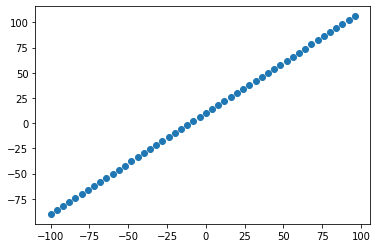

In [5]:
# Visualize data
import matplotlib.pyplot as pyplot

plt.scatter(X, y)

### The 3 sets ...

* **Training set** - the model learns from this data 70-80% of the total dataset
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of data available
* **Test set** - the model gets evaluated on this set, typically 10-15% of the total data available.

#### **Analogy**:

Training set -> Course Materials

Validation set -> Practice Exam

Test set -> Final Exam

In [6]:
len(X)

50

In [7]:
# Split the data into train and test sets
X_train = X[:40]  # first 40 are training samples (80% of the data) 
y_train = y[:40] # last 10 are training samples (20% of the data)

X_test = X[40:] # last 20%
y_test = y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualizing the data
Now we've got all data, let's visualize it

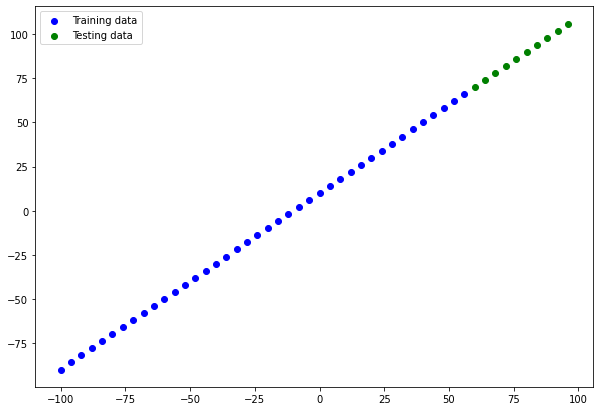

In [8]:
plt.figure(figsize=(10, 7))
# plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# show a legend
plt.legend()

In [11]:
# Let's have a look how to build a neural network for this data

# 1. Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)  
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

### Visualizing the model

In [12]:
model.summary()

ValueError: ignored

In [13]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [30]:
# Let's create a model which builds automatically
# by defining input shape argument
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, name='output_layer') # input 1 number to predict 1 number
],
name = 'simple_model')

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# show model summary
model.summary()

Model: "simple_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable parameters - these are the parameters (patterns) the model can update as it trains (these are weights and biases).
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learnt patterns from other models during **transfer learning**).

See reference how to calculate the number of trainable parameters:
https://deeplizard.com/learn/video/gmBfb6LNnZs

In [31]:
# Let's fit model to the training data
# verbose hides training loop printouts
model.fit(X_train, y_train, epochs=100, verbose=0)

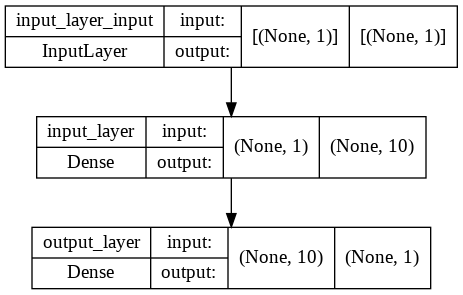

In [32]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing model's predictions